In [1]:
import backtrader as bt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#%matplotlib ipympl
%matplotlib inline

In [2]:
#!pip install ipympl

In [3]:
tsla_df=yf.download(tickers="TSLA")

[*********************100%***********************]  1 of 1 completed


In [4]:
tsla_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-03-31,197.529999,207.789993,197.199997,207.460007,207.460007,169638500
2023-04-03,199.910004,202.690002,192.199997,194.770004,194.770004,169545900
2023-04-04,197.320007,198.740005,190.320007,192.580002,192.580002,126463800


# Data Parsing

### In order to add the data to the backtrader we have to parse it.

In [5]:
tsla_df_parsed=bt.feeds.PandasData(dataname=tsla_df,datetime=None,open=0,high=1,low=2,close=4,volume=5,openinterest=-1)
tsla_df_parsed

### Convert the dataframe in csv format file

In [6]:
tsla_df.to_csv("tsla.csv")

In [7]:
df=pd.read_csv("tsla.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3211,2023-03-31,197.529999,207.789993,197.199997,207.460007,207.460007,169638500
3212,2023-04-03,199.910004,202.690002,192.199997,194.770004,194.770004,169545900
3213,2023-04-04,197.320007,198.740005,190.320007,192.580002,192.580002,126463800
3214,2023-04-05,190.520004,190.679993,183.759995,185.520004,185.520004,133882500


In [8]:
tsla_csv_parsed=bt.feeds.GenericCSVData(dataname="tsla.csv",                          # For csv file we use GenericCSV data
                                        datetime=0,
                                        open=1,high=2,
                                        low=3,close=4,volume=6,openinterest=-1,
                                       dtformat="%Y-%m-%d")                      # Specify datetime format also

# Loading the data into cerebro

In [9]:
cerebro=bt.Cerebro()

In [10]:
cerebro.adddata(tsla_csv_parsed)

In [11]:
from matplotlib import warnings
from matplotlib.dates import (HOURS_PER_DAY, MIN_PER_HOUR, SEC_PER_MIN,
    MONTHS_PER_YEAR, DAYS_PER_WEEK, SEC_PER_HOUR,
    SEC_PER_DAY, num2date, rrulewrapper,
    YearLocator, MicrosecondLocator)

In [12]:
#!pip uninstall matplotlib
#!pip install matplotlib==3.2.2

<IPython.core.display.Javascript object>


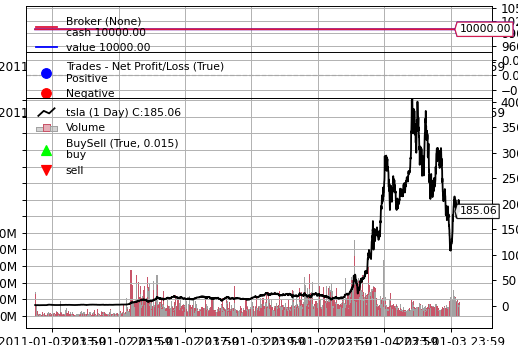

[[<Figure size 432x288 with 4 Axes>]]

In [13]:
cerebro.run()
%matplotlib widget
cerebro.plot(iplot=True)